##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get Started with TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To run the Colab notebook:

1. Connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

For more examples and guides (including details for this program), see [Get Started with TensorFlow](https://www.tensorflow.org/get_started/).

Let's get started, import the TensorFlow library into your program:

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


Load and prepare the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Let's examine our dataset. Below code was taken from https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

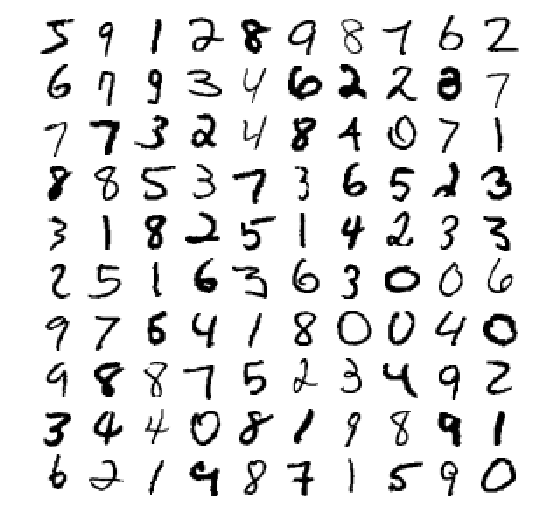

In [5]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

# Call our function to actually display images
plt.figure(figsize=(9,9))
example_images = np.r_[x_train[:12000:600], x_train[13000:30600:600], x_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

Build the `tf.keras` model by stacking layers. Select an optimizer and loss function used for training:

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train and evaluate model:

In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 56274s 938ms/sample - loss: 0.2221 - acc: 0.9343
Epoch 2/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0981 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0692 - acc: 0.9778
Epoch 4/5
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0535 - acc: 0.9829
Epoch 5/5
10000/10000 [==============================] - 10s 1ms/sample - loss: 0.0661 - acc: 0.9806


[0.06606164244894171, 0.9806]

You’ve now trained an image classifier with ~98% accuracy on this dataset. See [Get Started with TensorFlow](https://www.tensorflow.org/get_started/) to learn more.

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Import libraries to handle loading and displaying images

In [9]:
def make_prediction_and_display_image(np_image, tensorflow_model):
    image = np_image.reshape(1,28,28)

    print("Predicted Label: ", np.argmax(tensorflow_model.predict(image)[0]))
    print('Actual image:')
    plt.figure( figsize = (1,1))
    plt.imshow(image[0], cmap = 'gray')

Test our model with one random image in our test set.

Predicted Label:  4
Actual image:


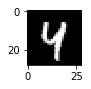

In [10]:
print("Predicted Label: ", np.argmax(model.predict(x_test)[42]))
print('Actual image:')
plt.figure( figsize = (1,1))
plt.imshow(x_test[42], cmap = 'gray')

Predicted Label:  3
Actual image:


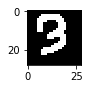

In [11]:
number_three = np.array(np.array(Image.open('3.png')))
make_prediction_and_display_image(number_three, model)

Predicted Label:  3
Actual image:


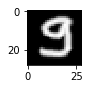

In [12]:
number_nine = np.array(np.array(Image.open('9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  0
Actual image:


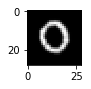

In [13]:
number_nine = np.array(np.array(Image.open('zero.png')))
make_prediction_and_display_image(number_nine, model)

Let's visualize how we are doing with our model using a . 

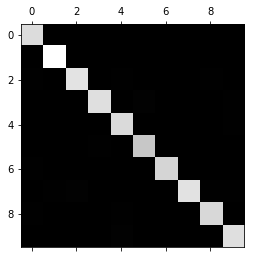

In [14]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(x_test)
conf_mx = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
plt.matshow(conf_mx, cmap=plt.cm.gray) 
plt.show()

We can now confirm that our model is not perfect. We actually misclassify 9 in this case. But let try our machine learning model with some other images.

Predicted Label:  3
Actual image:


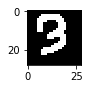

In [15]:
number_three = np.array(np.array(Image.open('3.png')))
make_prediction_and_display_image(number_three, model)

Predicted Label:  6
Actual image:


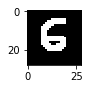

In [16]:
number_six= np.array(np.array(Image.open('6.png')))
make_prediction_and_display_image(number_six, model)

Predicted Label:  7
Actual image:


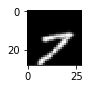

In [21]:
number_five = np.array(np.array(Image.open('seven.png')))
make_prediction_and_display_image(number_five, model)